## What is Data Preparation?
- Data preparation is the process of cleaning and transforming raw data prior to processing and analysis. It is an important step prior to processing and often involves reformatting data, making corrections to data and the combining of data sets to enrich data.

 - Data preparation is often a lengthy undertaking for data professionals or business users, but it is essential as a prerequisite to put data in context in order to turn it into insights and eliminate bias resulting from poor data quality.

 - For example, the data preparation process usually includes standardizing data formats, enriching source data, and/or removing outliers.

76% of data scientists say that data preparation is the worst part of their job, but the efficient, accurate business decisions can only be made with clean data. Data preparation helps:

    - Fix errors quickly — Data preparation helps catch errors before processing. After data has been removed from its original source, these errors become more difficult to understand and correct.
    - Produce top-quality data — Cleaning and reformatting datasets ensures that all data used in analysis will be high quality.
    - Make better business decisions — Higher quality data that can be processed and analyzed more quickly and efficiently leads to more timely, efficient and high-quality business decisions.
    
Additionally, as data and data processes move to the cloud, data preparation moves with it for even greater benefits, such as:
   - Superior scalability — Cloud data preparation can grow at the pace of the business. Enterprise don’t have to worry about the underlying infrastructure or try to anticipate their evolutions.
   - Future proof — Cloud data preparation upgrades automatically so that new capabilities or problem fixes can be turned on as soon as they are released. This allows organizations to stay ahead of the innovation curve without delays and added costs.
   - Accelerated data usage and collaboration — Doing data prep in the cloud means it is always on, doesn’t require any technical installation, and lets teams collaborate on the work for faster results.
   - Additionally, a good, cloud-native data preparation tool will offer other benefits (like an intuitive and simple to use GUI) for easier and more efficient preparation.

## Data Preparation Steps

### Remove Unwanted observations
The first step to data cleaning is removing unwanted observations from your dataset.

**This includes duplicate or irrelevant observations.**

**Duplicate observations**
Duplicate observations most frequently arise during data collection, such as when you:
- Combine datasets from multiple places
- Scrape data
- Receive data from clients/other departments

**Irrelevant observations**
Irrelevant observations are those that don’t actually fit the specific problem that you’re trying to solve.
- For example, if you were building a model for Single-Family homes only, you wouldn't want observations for Apartments in there.
- This is also a great time to review your charts from Exploratory Analysis. You can look at the distribution charts for categorical features to see if there are any classes that shouldn’t be there.
- Checking for irrelevant observations before engineering features can save you many headaches down the road.

### Fix Structural Errors

The next bucket under data cleaning involves fixing structural errors.

Structural errors are those that arise during measurement, data transfer, or other types of **"poor housekeeping."**

For instance, you can check for **typos** or **inconsistent capitalization.** This is mostly a concern for categorical features, and you can look at your bar plots to check.

Here's an example:
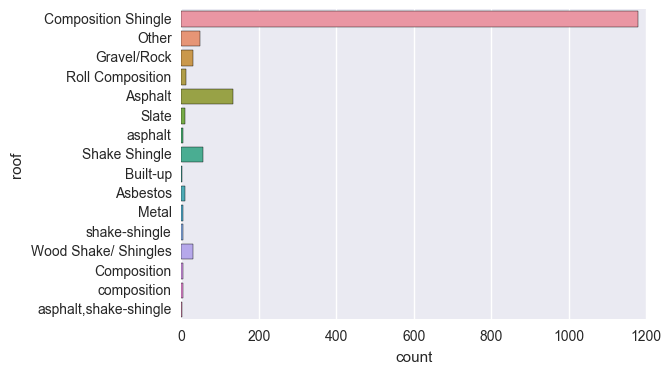

As you can see:

- 'composition' is the same as 'Composition'
- 'asphalt' should be 'Asphalt'
- 'shake-shingle' should be 'Shake Shingle'
- 'asphalt,shake-shingle' could probably just be 'Shake Shingle' as well

After we replace the typos and inconsistent capitalization, the class distribution becomes much cleaner:
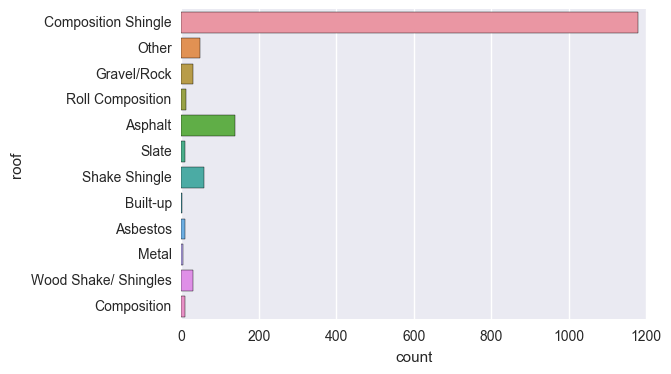

Finally, check for mislabeled classes, i.e. separate classes that should really be the same.

- e.g. If ’N/A’ and ’Not Applicable’ appear as two separate classes, you should combine them.
- e.g. ’IT’ and ’information_technology’ should be a single class.

### Filter Unwanted Outliers
Outliers can cause problems with certain types of models. For example, linear regression models are less robust to outliers than decision tree models.

In general, if you have a **legitimate** reason to remove an outlier, it will help your model’s performance.

However, outliers are **innocent until proven guilty.** You should never remove an outlier just because it’s a "big number." That big number could be very informative for your model.

We can’t stress this enough: you must have a good reason for removing an outlier, such as suspicious measurements that are unlikely to be real data.

you can check outliers by the help of percentiles
- In Numeric col
    - eg housing_Data.describe(percentiles=[.05,.25,.5,.75,.90,.95,.99])
    - eg. By using box plot ,
    ###### plt.figure(figsize=(17, 20)) 
    ###### plt.subplot(5,3,1)
    ###### sns.boxplot(y = 'ScreenPorch', palette='Set3', data = housing_Data) 
 



## Handle Missing Data
Missing data is a deceptively tricky issue in applied machine learning.

First, just to be clear, **you cannot simply ignore missing values in your dataset.** You must handle them in some way for the very practical reason that most algorithms do not accept missing values.

#### "Common sense" is not sensible here
Unfortunately, from our experience, the 2 most commonly recommended ways of dealing with missing data actually suck.

They are:

- 1. **Dropping** observations that have missing values
- 2. **Imputing** the missing values based on other observations

Dropping missing values is sub-optimal because when you drop observations, you ***drop information.***

- The fact that the value was missing may be informative in itself.
- Plus, in the real world, you often need to make predictions on new data even if some of the features are missing!

Imputing missing values is sub-optimal because the value was originally missing but you filled it in, which always leads to a loss in information, no matter how sophisticated your imputation method is.

- Again, ***"missingness"*** is almost always informative in itself, and you should ***tell your algorithm *** if a value was missing.
- Even if you build a model to impute your values, you’re not adding any real information. You’re just reinforcing the patterns already provided by other features.

In short, you should always tell your algorithm that a value was missing because ***missingness is informative.***

So how can you do so?

### Missing categorical data
The best way to handle missing data for categorical features is to simply label them as ’Missing’!

- You’re essentially adding a new class for the feature.
- This tells the algorithm that the value was missing.
- This also gets around the technical requirement for no missing values.

### Missing numeric data
For missing numeric data, you should **flag and fill** the values.

- Flag the observation with an indicator variable of missingness.
- Then, fill the original missing value with 0 just to meet the technical requirement of no missing values.
- By using this technique of flagging and filling, you are essentially **allowing the algorithm to estimate the optimal constant for missingness,** instead of just filling it in with the mean.

### Some of the command which will help you During cleaning process.

#### Missing value in %
round(100*(df.isnull().sum()/len(df.Id)), 2)

#### Return missing value in Categorical column only

missing =round(100*df.select_dtypes(include='object').isnull().sum()/len(df.Id)),2)
missing.loc[missing > 0]

#### Return missing value in Numeric Column only
missing =round(100*(df.select_dtypes(include=['int64','float']).isnull().sum()/len(df.Id)),2)

missing.loc[missing > 0]

#### Drop the columns where all elements are missing values:
df.dropna(axis=1, how='all')

#### Drop the columns where any of the elements are missing values
df.dropna(axis=1, how='any')

#### Keep only the rows which contain 2 missing values maximum
df.dropna(thresh=2)

#### Drop the columns where any of the elements are missing values
df.dropna(axis=1, how='any')

#### Fill all missing values with the mean of the particular column
df.fillna(df.mean())

#### Fill any missing value in column 'A' with the column median
df['A'].fillna(df['A'].median())

#### Fill any missing value in column 'Depeche' with the column mode
df['Depeche'].fillna(df['Depeche'].mode())

